# <h1 align="center"> BLIŽINA, EKSCENTRIČNOST IN VMESNA CENTRALNOST </h1>
<h2 align="center">Projekt pri predmetu Finančni praktikum</h2>
<h4 align="center">Avtorja: Eva Deželak, Nejc Lukežič</h4>
<h4 align="center">Mentorja: Riste Škrekovski, Janoš Vidali</h4> 

Pri najinem projektu bova s pomočjo treh različnih mer (ekscentričnosti, bližine in vmesne centralnosti) iskala in analizirala najpomembnejša vozlišča v grafih oziroma socialnih omrežjih. Vozlišče je pomembnejše, če ima višjo vrednost bližine in vmesne centralnosti ter nižjo vrednost ekscentričnosti. Natančnejši opisi mer so spodaj. Primerjala bova, kako pogosto je vozlišče, ki je pomembno z vidika ene mere, pomembno tudi v okviru ostalih dveh mer.

Najino glavno orodje za analizo grafov bo $Sage$, kjer bova generirala več grafov (približno 1000) v različnih velikostih (približno 10), grafe socialnih omrežij pa bova pridobila s spleta. Opazovala bova tudi, kako se vrednosti mer za najpomembnejša vozlišča spremenijo, če se omejimo na podgraf v določenem grafu. Grafi, ki jih bova pri projektu analizirala, bodo neusmerjeni.

## Bližina
Bližina je v povezanem grafu mera centralnosti, ki jo izračunamo kot
recipročno vsoto dolžin najkrajših poti med nekim vozliščem in vsemi
drugimi vozlišči v grafu. Bližje kot je opazovano vozlišče ostalim
vozliščem v grafu, bolj centralno je.

\begin{equation*}
C(x) = \frac{1}{\sum_{y}d(y,x)},
\end{equation*}

kjer je *d*(*y*, *x*) razdalja med vozliščema x in y. Pogosto se namesto
zgornje vrednosti izračuna povprečno dolžino najkrajše poti v grafu.
Dobimo jo tako, da zgornjo formulo pomnožimo z *N* − 1, kjer je *N*
število vseh vozlišč v grafu. Pri obsežnejših grafih se  − 1 izpusti iz
enačbe, zato se za bližino uporablja kar sledečo formulo:

\begin{equation*}
C(x) = \frac{N}{\sum_{y}d(y,x)}.
\end{equation*}

Pri usmerjenih grafih je potrebno upoštevati tudi smer povezav. Določeno
vozlišče ima lahko različno bližino za vhodne in izhodne povezave. V
nepovezanih grafih namesto recipročne vsote dolžin najkrajših poti med
vozlišči računamo vsoto recipročnih dolžin najkrajših poti med vozlišči.
Pri tem upoštevamo, da $1/\infty = 0$

\begin{equation*}
H(x) = \frac{N}{\sum_{y \neq x}d(y,x)}.
\end{equation*}

## Ekscentričnost
Ekscentričnost nekega vozlišča $v$  v povezanem grafu $G$ označimo z $\epsilon(v)$ in je definirana kot maksimalna dolžina med vozliščem $v$ in katerimkoli drugim vozliščem v grafu $G$. V nepovezanih grafih imajo vsa vozlišča neskončno vrednost ekscentičnosti.
Maksimalno ekscentričnost v grafu imenujemo diameter (premer) grafa (najdaljša najkrajša pot med dvema vozliščema grafa), minimalno ekscentričnost pa polmer grafa.

## Vmesna centralnost

V teoriji grafov je vmesna centralnost mera centralizacije grafa, ki temelji na najkrajših poteh v grafu. Za vsak par vozlišč v povezanem grafu, obstaja vsaj ena najkrajša pot med vozliščema tako, da je katerokoli število povezav, po katerih gre ta pot (za neutežene grafe) ali pa vsota uteži na povezavah (za utežene grafe) minimalna. Vmesna centralnost za vsako vozlišče je število teh najkrajših poti, ki grejo skozi vozlišče. Vmesna centralnost se uporablja v mnogih problemih v teoriji omrežij, tudi v problemih povezanih s socialnimi omrežji, biologijo in transportom. V telekomunikacijskem omrežju ima vozlišče z višjo vrednostjo vmesne centralnosti večjo kontrolo nad omrežjem, ker bo več informacij teklo čez to vozlišče. Vmesna centralnost vozlišča $v$ je podana z izrazom:

\begin{equation*}
g(v) = \sum_{s \ne v \ne t}^{ } \frac{\sigma_{st} (v)}{\sigma_{st}}
\end{equation*}

Kjer je $\sigma_{st}$ skupno število najkrajših poti od vozlišča $s$ do vozlišča $t$ in $\sigma_{st} (v)$ je število teh poti, ki grejo skozi $v$. 

## Implementacija algoritma
Najprej se bova osredotočila na implementacijo algoritma. Kot prvo sva definirala bližino, ekscentričnost in vmesno centralnost, nato pa sva za sam algoritem potrebovala še dve funkciji, in sicer *najboljsa_vozlisca* in *skupna*. Prva nam pomaga iz seznama vozlišč in mer, ki jih dobimo na začetku v funkcijah *blizina*, *ekscentricnost* in *vmesna_centralnost*, izločiti tista vozlišča, ki predstavljajo najboljših 10% vozlišč. Pri bližini in vmesni centralnosti so to vozlišča, ki imajo najvišjo vrednost, pri ekscentričnosti pa vozlišča z najmanjšo vrednostjo. V drugi funkciji pa preverimo, katera vozlišča so skupna v vseh treh seznamih najboljših vozlišč. Na ta način dobimo množico tistih vozlišč, ki se pojavijo v vseh treh merah kot najboljša. V funkciji *algoritem*, ki je odvisna od podane velikosti za graf, pa nato za 100 grafov iste velikosti poračunamo kolikšen procent vozlišč se ujema pri vseh treh merah. Sproti računamo še povprečje tega procenta za vseh 100 grafov, kar bova v drugem delu tudi poskusila analizirati. 

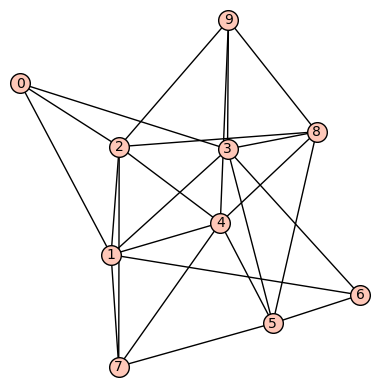

In [2]:
G = graphs.RandomGNP(10, 0.5) #Generiranje naključnega grafa - prva vrednost, ki jo funkcija sprejme pove število vozlišč, druga pa verjetnost pojavitve povezave med dvema vozliščema.
show(G)

In [3]:
def blizina(G):
    seznam = []
    d = G.distance_all_pairs()
    for x in G:
        D = 1/sum(d[x].values())
        seznam.append((x,D))
    return seznam
blizina(G)

[(0, 1/15),
 (1, 1/12),
 (2, 1/12),
 (3, 1/12),
 (4, 1/12),
 (5, 1/13),
 (6, 1/15),
 (7, 1/14),
 (8, 1/13),
 (9, 1/14)]

In [4]:
def ekscentricnost(G):
    seznam = []
    for x in G:
        E = G.eccentricity(x)
        seznam.append((x,E))
    return seznam
ekscentricnost(G)

[(0, 2),
 (1, 2),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 2),
 (6, 2),
 (7, 2),
 (8, 2),
 (9, 2)]

In [5]:
import networkx as nx 

def vmesna_centralnost(G):
    for x in G:
        nxG = G.networkx_graph()
        Vslovar = nx.betweenness_centrality(nxG) #To nam vrne slovar, kjer je vozlišče ključ in vmesna centralnost vozlišča vrednost.
        V = Vslovar.items() #Slovar moramo pretvoriti v seznam, da bo prave oblike za algoritem.
        return V
vmesna_centralnost(G)

[(0, 0.006944444444444444),
 (1, 0.125),
 (2, 0.09722222222222221),
 (3, 0.14583333333333331),
 (4, 0.06712962962962961),
 (5, 0.07175925925925924),
 (6, 0.006944444444444444),
 (7, 0.0162037037037037),
 (8, 0.032407407407407406),
 (9, 0.013888888888888888)]

In [6]:
import math

def najboljsa_vozlisca(G, velikost, B, E, V):

    najboljsi = round(velikost * 0.1) #Izračunamo, koliko najboljših vozlišč bomo vzeli, če želimo 10% najboljših.
    B.sort(key=lambda x: -x[1]) #Seznam vozlišč in izračunane njihove bližine uredimo padajoče glede na vrednost mere.
    maxB = B[:najboljsi] #Iz zgornjega seznama vzamemo najboljše elemente - 10% vozlišč z najvišjo vrednostjo bližine.
    minimalni = min(maxB, key=lambda x: x[1])[1] #Preveriti moramo še, če je slučajno v B ostal kakšen element, ki ima enako vrednost, kot jo ima najmanjši element v maxB, saj mora biti potem to vozlišče tudi v maxB.
    for element in B:
        if element[1] == minimalni:
            maxB.append((element[0], element[1]))

    E.sort(key=lambda x: x[1]) #Seznam vozlišč in izračunane njihove ekscentričnosti uredimo naraščajoče glede na vrednost mere.
    minE = E[:najboljsi] #Iz zgornjega seznama vzamemo najboljše elemente - 10% vozlišč z najnižjo vrednostjo ekscentričnosti.
    maksimalni = max(minE, key=lambda x: x[1])[1] #Preveriti moramo še, če je slučajno v E ostal kakšen element, ki ima enako vrednost, kot jo ima največji element v minE, saj mora biti potem to vozlišče tudi v minE
    for element in E:
        if element[1] == maksimalni:
            minE.append((element[0], element[1]))


    V.sort(key=lambda x: -x[1]) #Seznam vozlišč in izračunane njihove vmesne centralnosti uredimo padajoče glede na vrednost mere.
    maxV = V[:najboljsi] #Iz zgornjega seznama vzamemo najboljše elemente - 10% vozlišč z najvišjo vrednostjo vmesne centralnoti.
    minimalni = min(maxV, key=lambda x: x[1])[1] #Preveriti moramo še, če je slučajno v V ostal kakšen element, ki ima enako vrednost, kot jo ima najmanjši element v maxV, saj mora biti potem to vozlišče tudi v maxV
    for element in V:
        if element[1] == minimalni:
            maxV.append((element[0], element[1]))

    return(maxB, minE, maxV) #Funkcija vrne najpomembnejša vozlišča in njihove vrednosti mere.

In [7]:
def skupna(maxB, minE, maxV):
    imenaB = [] #Shranimo samo imena najpomembnejših vozlišč iz vidika bližine v nov seznam.
    for element in maxB:
        imenaB+= [element[0]]
        
    imenaE = [] #Shranimo samo imena najpomembnejših vozlišč iz vidika ekscentričnosti v nov seznam.
    for element in minE:
        imenaE+= [element[0]]

    imenaV = [] #Shranimo samo imena najpomembnejših vozlišč iz vidika vmesne centralnosti v nov seznam.
    for element in maxV:
        imenaV+= [element[0]]

    skupna_vozl = set(imenaB).intersection(imenaE).intersection(imenaV) #Naredimo presek vseh treh seznamov.
    return(skupna_vozl) #Vrne seznam imen najboljših vozlišč v grafu.

In [8]:
from __future__ import division

def algoritem(velikost, izpis=False):
    vsota = 0
    j = 0
    povprecje = 0
    for i in range(100):
        G = graphs.RandomGNP(velikost, 0.0108) #Generiramo naključen graf z določeno velikostjo, v katerem je verjetnost pojavitve povezave določena z drugim argumentom funkcije.
        if G.is_connected() == True: #Preverimo, če je graf povezan - zanimajo nas samo povezani grafi.
            B = blizina(G) #Dobimo seznam vozlišč in vrednosti njihove bližine.
            E = ekscentricnost(G) #Dobimo seznam vozlišč in vrednosti njihove ekscentričnosti.
            V = vmesna_centralnost(G) #Dobimo seznam vozlišč in vrednosti njihove vmesne centralnosti.
            
            maxB, minE, maxV = najboljsa_vozlisca(G, velikost, B, E, V) #Naredimo sezname najboljših vozlišč za vsako mero posebej.
            skupna_vozlisca = skupna(maxB, minE, maxV) #Preverimo, katera vozlišča so pomembna glede na vrednosti vseh treh mer.
            stevilo_skupnih_vozlisc = len(skupna_vozlisca) #Preštejemo skupna vozlišča.
            pokritost = float(stevilo_skupnih_vozlisc / max(len(maxB), len(minE), len(maxV))) #Izračunamo kakšen odstotek najpomembnejših vozlišč je med najpomembnejšimi (v zgornjih 10% oz. izjemoma več kot 10%) glede na vse tri mere.
            vsota += pokritost
            j += 1
            povprecje = vsota / j #Sproti računamo povprečno pokritost za vse grafe.
            if izpis:
                print(povprecje)
        
    return(povprecje)
            
        
        
   
algoritem(2000)

Sedaj se bova osredotočila na analizo 100-tih grafov, kot sva napisala že zgoraj. Zanima naju, če se bo s spreminjanjem velikosti grafa spreminjala tudi pokritost najboljših vozlišč. To bova storila tako, da bova klicala funkcijo *algoritem* za različne velikosti grafov. Izbrala sva si velikosti 20, 40, 75, 100, 200, 400, 800, 1000, 2000.  

In [2]:
velikosti = (20, 40, 75, 100, 200, 400, 800, 1000, 2000) #Izberemo si velikosti grafov, na katerih bomo delali analizo.
seznam_velikosti = list(velikosti)

In [9]:
from json import dump

povprecja = []
for i in velikosti:
    povprecja.append(algoritem(i)) #Za vsako velikost poženemo algoritem, da dobimo povprečno pokritost.
    print(povprecja[-1])
    with open("povprecja.json", "w") as f:
        dump(povprecja, f)

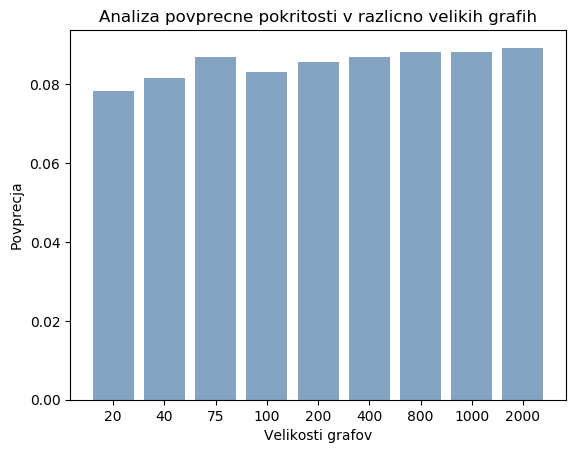

In [3]:
#Grafična predstavitev analize povprečne pokritosti v različno velikih grafih.
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
from json import load

with open("povprecja.json") as f:
    povprecja = load(f)
y_pos = np.arange(len(povprecja))
plt.bar(y_pos,povprecja,align = 'center',color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos,velikosti)
plt.xlabel('Velikosti grafov')
plt.ylabel('Povprecja')
plt.title('Analiza povprecne pokritosti v razlicno velikih grafih')
plt.show()

Analizirali smo torej grafe velikosti 20, 40, 75, 100, 200, 400, 800, 1000 in 2000, kot je tudi razvidno v zgornjem grafu. Najprej smo za vsako velikost generirali 100 naključnih grafov in za njih izračunali vrednosti pokritosti - odstotek vozlišč, ki se za vse tri mere pojavljajo v zgornjih 10% najboljših vozlišč. Povprečje stotih rezultatov za vsako velikost grafa je naš želeni rezultat. Iz grafa lahko razberemo, da je povprečna pokritost v grafih neodvisna od velikosti grafa. Pri verjetnosti povezave 0,7 je povprečna pokritost v grafu približno 8%. Razlike med velikostmi grafov bi bile verjetno še manjše, če bi pokritost izračunali na večjem številu grafov.

## Socialno omrežje

V obliki grafa lahko predstavimo tudi socialna omrežja. Vozlišča takega grafa predstavljajo ljudi, povezava med vozliščema pa prijateljstvo med dvema osebama v socialnem omrežju. Na spletu sva našla primer Facebook-ovega omrežja, ga pretvorila v graf ter na njem izvedla podobno analizo kot na običajnih grafih zgoraj. Zanimala naju bo predvsem primerjava med grafom v obliki socialnega omrežja in naključno generiranimi grafi. Torej ponovno bova klicala zgoraj naštete funkcije, torej *blizina*, *ekscentricnost*, *vmesna_centralnost*, *najboljsa_vozlisca* in *skupna*. Definirala pa bova funkcijo *algoritem_soc*, ki bo sprejela socialno omrežje in podobno kot zgoraj zračunala najboljša vozlišča glede na najine mere ter nato seveda pokritost socialnega omrežja.

In [9]:
import networkx as nx
import math

G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int) #Iz datoteke smo socialno omrežje zapisali v obliki grafa.
#Graf ima 4039 vozlišč in 88234 povezav
G_fb_sage = Graph(G_fb) #Zgornji graf smo pretvorili v Sage-ov graf.
G_tretji = nx.read_edgelist("testni5.txt", create_using = nx.Graph(), nodetype=int) #Iz datoteke smo socialno omrežje zapisali v obliki grafa.
G_sage_tretji = Graph(G_tretji) #Zgornji graf smo pretvorili v Sage-ov graf.


def algoritem_soc(socialno_omrezje):
    B = blizina(socialno_omrezje) #Dobimo seznam vozlišč in njihove vrednosti bližine.
    E = ekscentricnost(socialno_omrezje) #Dobimo seznam vozlišč in njihove vrednosti ekscentričnosti.
    V = vmesna_centralnost(socialno_omrezje) #Dobimo seznam vozlišč in njihove vrednosti vmesne centralnosti.
    povprecje = 0
    velikost = 4039 #Velikost primera Facebook-ovega socialnega omrežja.
    maxB, minE, maxV = najboljsa_vozlisca(socialno_omrezje, velikost, B, E, V) #Naredimo sezname najboljših vozlišč za vsako mero posebej
    skupna_vozlisca_soc = skupna(maxB, minE, maxV) #preverimo, koliko vozlišč je vsem trem meram skupno
    stevilo_skupnih_vozlisc_soc = len(skupna_vozlisca_soc) #preštejemo števila skupnih vozlišč
    povprecje = float(stevilo_skupnih_vozlisc_soc / max(len(maxB), len(minE), len(maxV))) #Izračunamo kakšen odstotek najpomembnejših vozlišč je med najpomembnejšimi (v zgornjih 10% oz. izjemoma več kot 10%) glede na vse tri mere.
    return(povprecje)

algoritem_soc(G_sage_tretji)

0.5625

Da bova lahko dobljene rezultate za socialno omrežje s čim primerjala, bova klicala funkcijo *algoritem* na grafih enake velikosti, kot je najino socialno omrežje, torej 4039, pri čemer bova vzela verjetnost povezave 0,0108. Funkcija *algoritem* bo torej generirala 100 takšnih grafov, ki bodo primerljivi s socialnim omrežjem, ter zračunala povprečno pokritost, da bo lahko primerjava bolj točna.

In [10]:
from json import dump

povprecja = [] #Sedaj bomo primerjali socialno omrežje in generirane grafe, zato bomo najprej dodati povprečje za socialno omrežje, nato pa še za generirane grafe.
povprecja.append(algoritem_soc(G_fb_sage))
povprecja
#with open("povprecja_soc.json", "w") as f:
    #dump(povprecja, f)
povprecja.append(algoritem(4039, p=0.0108, izpis=True)) #Generirali smo 100 grafov iste velikosti kot Facebook-ovo socialno omrežje in z isto verjetnostjo povezave med dvema vozliščema.
povprecja
#with open("povprecja_soc.json", "w") as f:
 #   dump(povprecja, f)
    

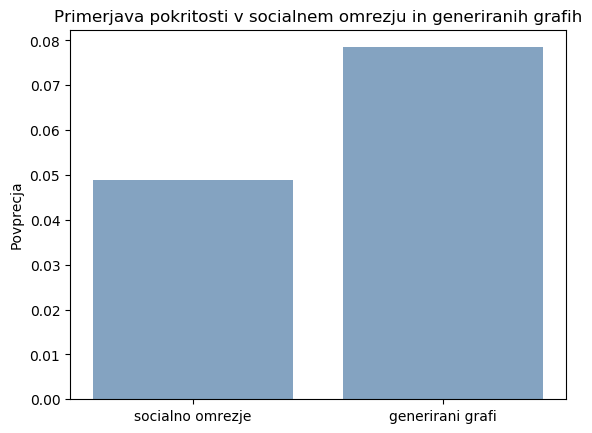

In [1]:
#Grafična predstavitev primerjave pokritosti v socialnem omrežju in generiranih grafih.
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
from json import load

with open("povprecja_soc.json") as f:
    povprecja = load(f)

grafi = ("socialno omrezje", "generirani grafi")
y_pos = np.arange(len(povprecja))
plt.bar(y_pos,povprecja,align = 'center',color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos,grafi)
plt.ylabel('Povprecja')
plt.title('Primerjava pokritosti v socialnem omrezju in generiranih grafih')
plt.show()

Iz grafičnega prikaza pokritosti v socialnem omrežju in pri primerljivih generiranih grafih je opaziti precej veliko razliko med vrednostima. Vrednost pokritosti v socialnem omrežju znaša približno 5%, povprečje vrednosti pokritosti pri 100 generiranih primerljivih grafih pa skoraj 8%. Razlika je verjetno posledica tega, da so povezave v generiranih grafih razpršene naključno, v socialnem omrežju pa je to nekoliko drugače. Če predpostavimo, da je opazovano socialno omrežje prikaz resničnih poznanstev med ljudmi, je verjetnost povezave med dvema osebama, ki imata veliko skupnih prijateljev (povezav z istimi vozlišči), večja kot z vozliščem, kjer je skupnih prijateljev malo ali nič. Pri naključno generiranih grafih se take situacije ne upoštevajo.

## Podgrafi

Z naslednjo analizo sva hotela ugotoviti, kako se vrednost pokritosti za grafe spremeni, če se omejimo le na njihove podgrafe. Analizo sva izvajala na grafih s 400 vozlišči in za vsakega od njih generirala 4 podgrafe z različnimi vrednostmi pojavitve povezave med vozliščema. Pri prvem podgrafu sva vzela verjetnost povezave 0.95, na naslednjem 0.8, nato 0.65 in na zadnjem 0.5. Izračunala sva vrednosti njihovih pokritosti in jih primerjala s pokritostjo prvotnega grafa.

In [25]:
from __future__ import division

def shrani_podgrafe(G):
    seznam = []
    #Generiramo štiri podgrafe različnih  in jih shranimo v seznam.
    for i in range(4):
        seznam.append(G.random_subgraph(0.95 - i*0.15))
    return seznam

def izracunaj_mere_za_podgrafe(G_sub,mera):
    seznam = []
    #Izračunamo mere za vse štiri podgrafe in jih shranimo v seznam.
    if mera == "blizina":
        for i in range(4):
            seznam.append(blizina(G_sub[i]))
    elif mera == "ekscentricnost":
        for i in range(4):
            seznam.append(ekscentricnost(G_sub[i]))
    elif mera == "vmesna_centralnost":
        for i in range(4):
            seznam.append(vmesna_centralnost(G_sub[i]))
    return seznam

def izracunaj_povprecje(skupna_vozlisca,skupna_prvotni):
    if len(skupna_vozlisca) > 0: #Na ta način smo preprečili deljenje z 0 v primeru, da v grafu ni skupnih vozlišč.
        return  len(skupna_prvotni)/len(skupna_vozlisca) #Odstotek ujemanja.
        return 0

def algoritem_sub(velikost, izpisi=False):
    k = 100 #Število generiranih podagrafov.
    vsota_prvotni_sub = [0, 0, 0, 0]
    j = 0
   
    for i in range(k):
        G = graphs.RandomGNP(velikost, 0.7) #Generiramo graf.
        if G.is_connected() == True: #Preverimo, če je povezan.
            B = blizina(G) #Dobimo seznam vozlišč in njihove vrednosti bližine.
            E = ekscentricnost(G) #Dobimo seznam vozlišč in njihove vrednosti ekscentričnosti.
            V = vmesna_centralnost(G) #Dobimo seznam vozlišč in njihove vrednosti vmesne centralnosti.
            #Za vsak graf naredimo 4 podgrafe štirih različnih velikosti.
            G_sub = shrani_podgrafe(G)
            B_sub = izracunaj_mere_za_podgrafe(G_sub,"blizina")
            E_sub = izracunaj_mere_za_podgrafe(G_sub,"ekscentricnost")
            V_sub = izracunaj_mere_za_podgrafe(G_sub,"vmesna_centralnost")
           
            
            maxB, minE, maxV = najboljsa_vozlisca(G, velikost, B, E, V) #Naredimo sezname najboljših vozlišč za vsako mero posebej.
            max_B_minE_maxV_sub = []
            for i in range(4):
                max_B_minE_maxV_sub.append(najboljsa_vozlisca(G_sub[i],velikost*(0.95 - i*0.15),B_sub[i], E_sub[i], V_sub[i]))
            
            skupna_vozlisca = skupna(maxB, minE, maxV) #Preverimo, koliko vozlišč je vsem trem meram skupno.
            skupna_vozlisca_sub = []
            for i in range(4):
                skupna_vozlisca_sub.append(skupna(max_B_minE_maxV_sub[i][0],max_B_minE_maxV_sub[i][1],max_B_minE_maxV_sub[i][2]))

            
            #Primerjava podgrafov in originalnega grafa - presek podgrafa in originalnega grafa.
            skupni_prvotni_sub = []
            for i in range(4):
                skupni_prvotni_sub.append(set(skupna_vozlisca).intersection(skupna_vozlisca_sub[i]))
            
            j += 1
            for i in range(4):
                vsota_prvotni_sub[i] += izracunaj_povprecje(skupna_vozlisca_sub[i],skupni_prvotni_sub[i])
            povprecje_prvotni_sub = [v/j for v in vsota_prvotni_sub]
                
            
        
    return(povprecje_prvotni_sub)
           
algoritem_sub(50)

[0.7894603360709879,
 0.9652348473984531,
 0.9833402902041894,
 0.7884019052891574]

In [0]:
from json import dump
povprecja = algoritem_sub(400, izpisi=True)
with open("povprecja_sub.json", "w") as f:
    dump(povprecja, f)

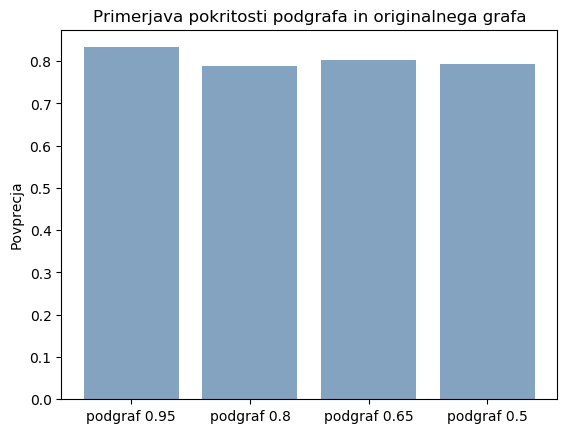

In [3]:
#Grafična predstavitev primerjave pokritosti podgrafa in prvotnega grafa.
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
from json import load

with open("povprecja_sub.json") as f:
    povprecja = load(f)

grafi = ("podgraf 0.95", "podgraf 0.8", "podgraf 0.65", "podgraf 0.5")
y_pos = np.arange(len(povprecja))
plt.bar(y_pos,povprecja,align = 'center',color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos,grafi)
plt.ylabel('Povprecja')
plt.title('Primerjava pokritosti podgrafa in originalnega grafa')
plt.show()

Iz grafičnega prikaza rezultatov vidimo, da se vrednost pokritosti v grafih z različno verjetnostjo pojavitve povezave iz prvotnega grafa skoraj ne razlikuje. Z analizo narejeno na 100 generiranih podgrafih originalnega grafa s 400 vozlišči sva prišla do ugotovitve, da znaša vrednost pokritosti v vseh podgrafih približno 8%. Ista vrednost se je pojavila že pri iskanju vrednosti pokritosti na generiranih grafih različnih velikosti. Iz rezultatov obeh testiranj lahko podava zaključek, da vrednost pokritosti grafa ostaja konstantna neodvisno od števila vozlišč v njem ali velikosti podgrafa. Vrednost pokritosti bi se morda spremenila, če bi celotno analizo ponovila z grafi, ki bi jih generirala z drugačno vrednostjo verjetnosti povezave med parom vozlišč.

## Zaključek

Pri najinem projektu sva se podrobneje seznanila s tremi merami centralnosti - bližino, ekscentričnostjo in vmesno centralnostjo, ki jih uporabljamo za analizo grafov in socialnih omrežij ter iskanje najpomembnejših vozlišč grafa oziroma najvplivnejših oseb socialnega omrežja. Pred analizo si nisva postavila nobenih hipotez, a naju je rezultat pri analizi pokritosti v različno velikih grafih in primerjavi pokritosti med grafom ter podgrafi nekoliko presenetil, saj sva pričakovala večje nihanje povprečij vrednosti glede na velikost grafa oziroma verjetnostjo povezave v podgrafu. Pri primerjavi socialnega omrežja in primerljivih grafov je bila razlika med rezultatoma večja, kar sva skušala utemeljiti z razliko med delovanjem socialnega omrežja in naključnim generiranjem grafov.